PENDULO DOBLE 

In [1]:
from numpy import array, linspace,arange
from math import sin, cos, pi
from pylab import plot, xlabel, ylabel, show,grid,legend
from scipy.integrate import odeint
from vpython import sphere, scene, vector, color, arrow, text, sleep,cylinder


<IPython.core.display.Javascript object>

In [8]:
def func (conds, t, g, l): #Función que devuelve valores de theta y omega(arreglo)
    phi1=conds[0]
    phi2=conds[2]
    dphi1=conds[1]
    dphi2=conds[3]
    ddphi1=-((conds[1]**2)*sin(2*conds[0]-2*conds[2])+2*(conds[3]**2)*sin(conds[0]-conds[2])+(g/l)*\
             (sin(conds[0]-2*conds[2])+3*sin(conds[0])))/(3-cos(2*conds[0]-2*conds[2]))
    ddphi2=((4*(conds[1]**2)*sin(conds[0]-conds[2]))+((conds[3])**2)*sin(2*conds[0]-2*conds[2])+2*(g/l)*\
            (sin(2*conds[0]-conds[2])-sin(conds[2])))/(3-cos(2*conds[0]-2*conds[2]))
    return array([dphi1,ddphi1,dphi2,ddphi2], float)

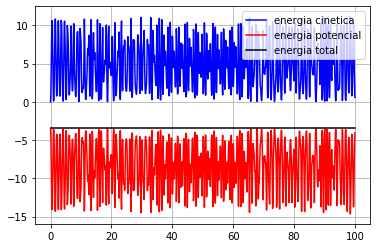

In [13]:
#constantes
R = 0.05 #Radio de la esfera
g = 9.81
l = 0.5
m = 1
phi1=90*pi/180.
dphi1=0.
phi2=45*pi/180.
dphi2=0.
initcond = array([phi1,dphi1,phi2,dphi2])

n_steps = 1000 #Número de pasos
t_start = 0.   #Tiempo inicial
t_final = 100.  #Tiempo final
t_delta = (t_final - t_start) / n_steps #Diferencial de tiempo (Paso temporal)
t = linspace(t_start, t_final, n_steps) #Arreglo de diferencial de tiempo

solu, outodeint = odeint( func, initcond, t, args = (g, l), full_output=True) #Solución de la ecuación diferencial(Parámetros acordes a los definidos en la función)
#solu (Matriz de n filas y 2 columnas) es la solución diferencial para cada paso(columnas) de theta y omega

phi_1,aa,phi_2,bb= solu.T #Devuelve la matriz transpuesta (a cada una de las variables de la izquierda, theta y omega, le define el respectivo vector)

k=[]
u=[]
et=[]
for i in arange (0,n_steps,1):
    xp = l*cos(phi_1[i]) #Pasa de coordenadas polares a cartesianas
    yp = l*sin(phi_1[i])
    xs=l*(cos(phi_1[i])+cos(phi_2[i]))
    ys=l*(sin(phi_1[i])+sin(phi_2[i]))
    UMAx=-m*g*l*(3)
    U=-m*g*l*(2*cos(phi_1[i])+cos(phi_2[i]))
    K=m*(1/2)*(l**2)*(2*(aa[i])**2+(bb[i])**2+2*(aa[i]*bb[i]*cos(phi_1[i]-phi_2[i])))
    ET=K+(U)
    k.append(K)
    u.append(U)
    et.append(ET)
grid('on')
plot(t,k,'b',label='energia cinetica')
plot(t,u,'r',label='energia potencial')
plot(t,et,'k',label='energia total')
legend()
#print(k[0])
#print(u[0])
#print(UMAx)
show()


In [7]:
scene.range = 2.2*l #Tamaño de la ventana de fondo

xp = l*sin(phi1) #Pasa de coordenadas polares a cartesianas
yp = -l*cos(phi1)
zp = 0.

xs=l*(sin(phi1)+sin(phi2))
ys=-l*(cos(phi1)+cos(phi2))
zs=0.

sleeptime = 0.01 #Tiempo con que se actualiza la posición de la partícula

prtcl = sphere(pos=vector(xp,yp,zp), radius=R, color=color.blue) #Define objeto con que se va a trabajar
prtcls= sphere(pos=vector(xs,ys,zs), radius=R, color=color.blue)
cuerdas1=cylinder(pos=prtcl.pos,axis=vector(0,0,0),radius=0.007,color=color.white)
cuerdas2=cylinder(pos=prtcl.pos,axis=vector(l,0,0),radius=0.007,color=color.white)
time_i = 0 #Contador que se mueve en el espacio temporal en el que se resolvió la ecuación diferencial
t_run = 0  #Tiempo en el que se ejecuta la animación
while t_run < t_final: #ANIMACIÓN
    prtcl.pos = vector( l*sin(phi_1[time_i]), -l*cos(phi_1[time_i]), zp )
    prtcls.pos= vector( l*(sin(phi_1[time_i])+sin(phi_2[time_i])), -l*(cos(phi_1[time_i])+cos(phi_2[time_i])), zs )
    cuerdas2.pos=prtcls.pos
    cuerdas2.axis=prtcl.pos-prtcls.pos
    cuerdas1.pos=prtcl.pos
    cuerdas1.axis=vector(0,0,0)-prtcl.pos
    t_run += t_delta
    sleep(sleeptime)
    time_i += 1

IndexError: index 1000 is out of bounds for axis 0 with size 1000